## *What is custom dataset?*
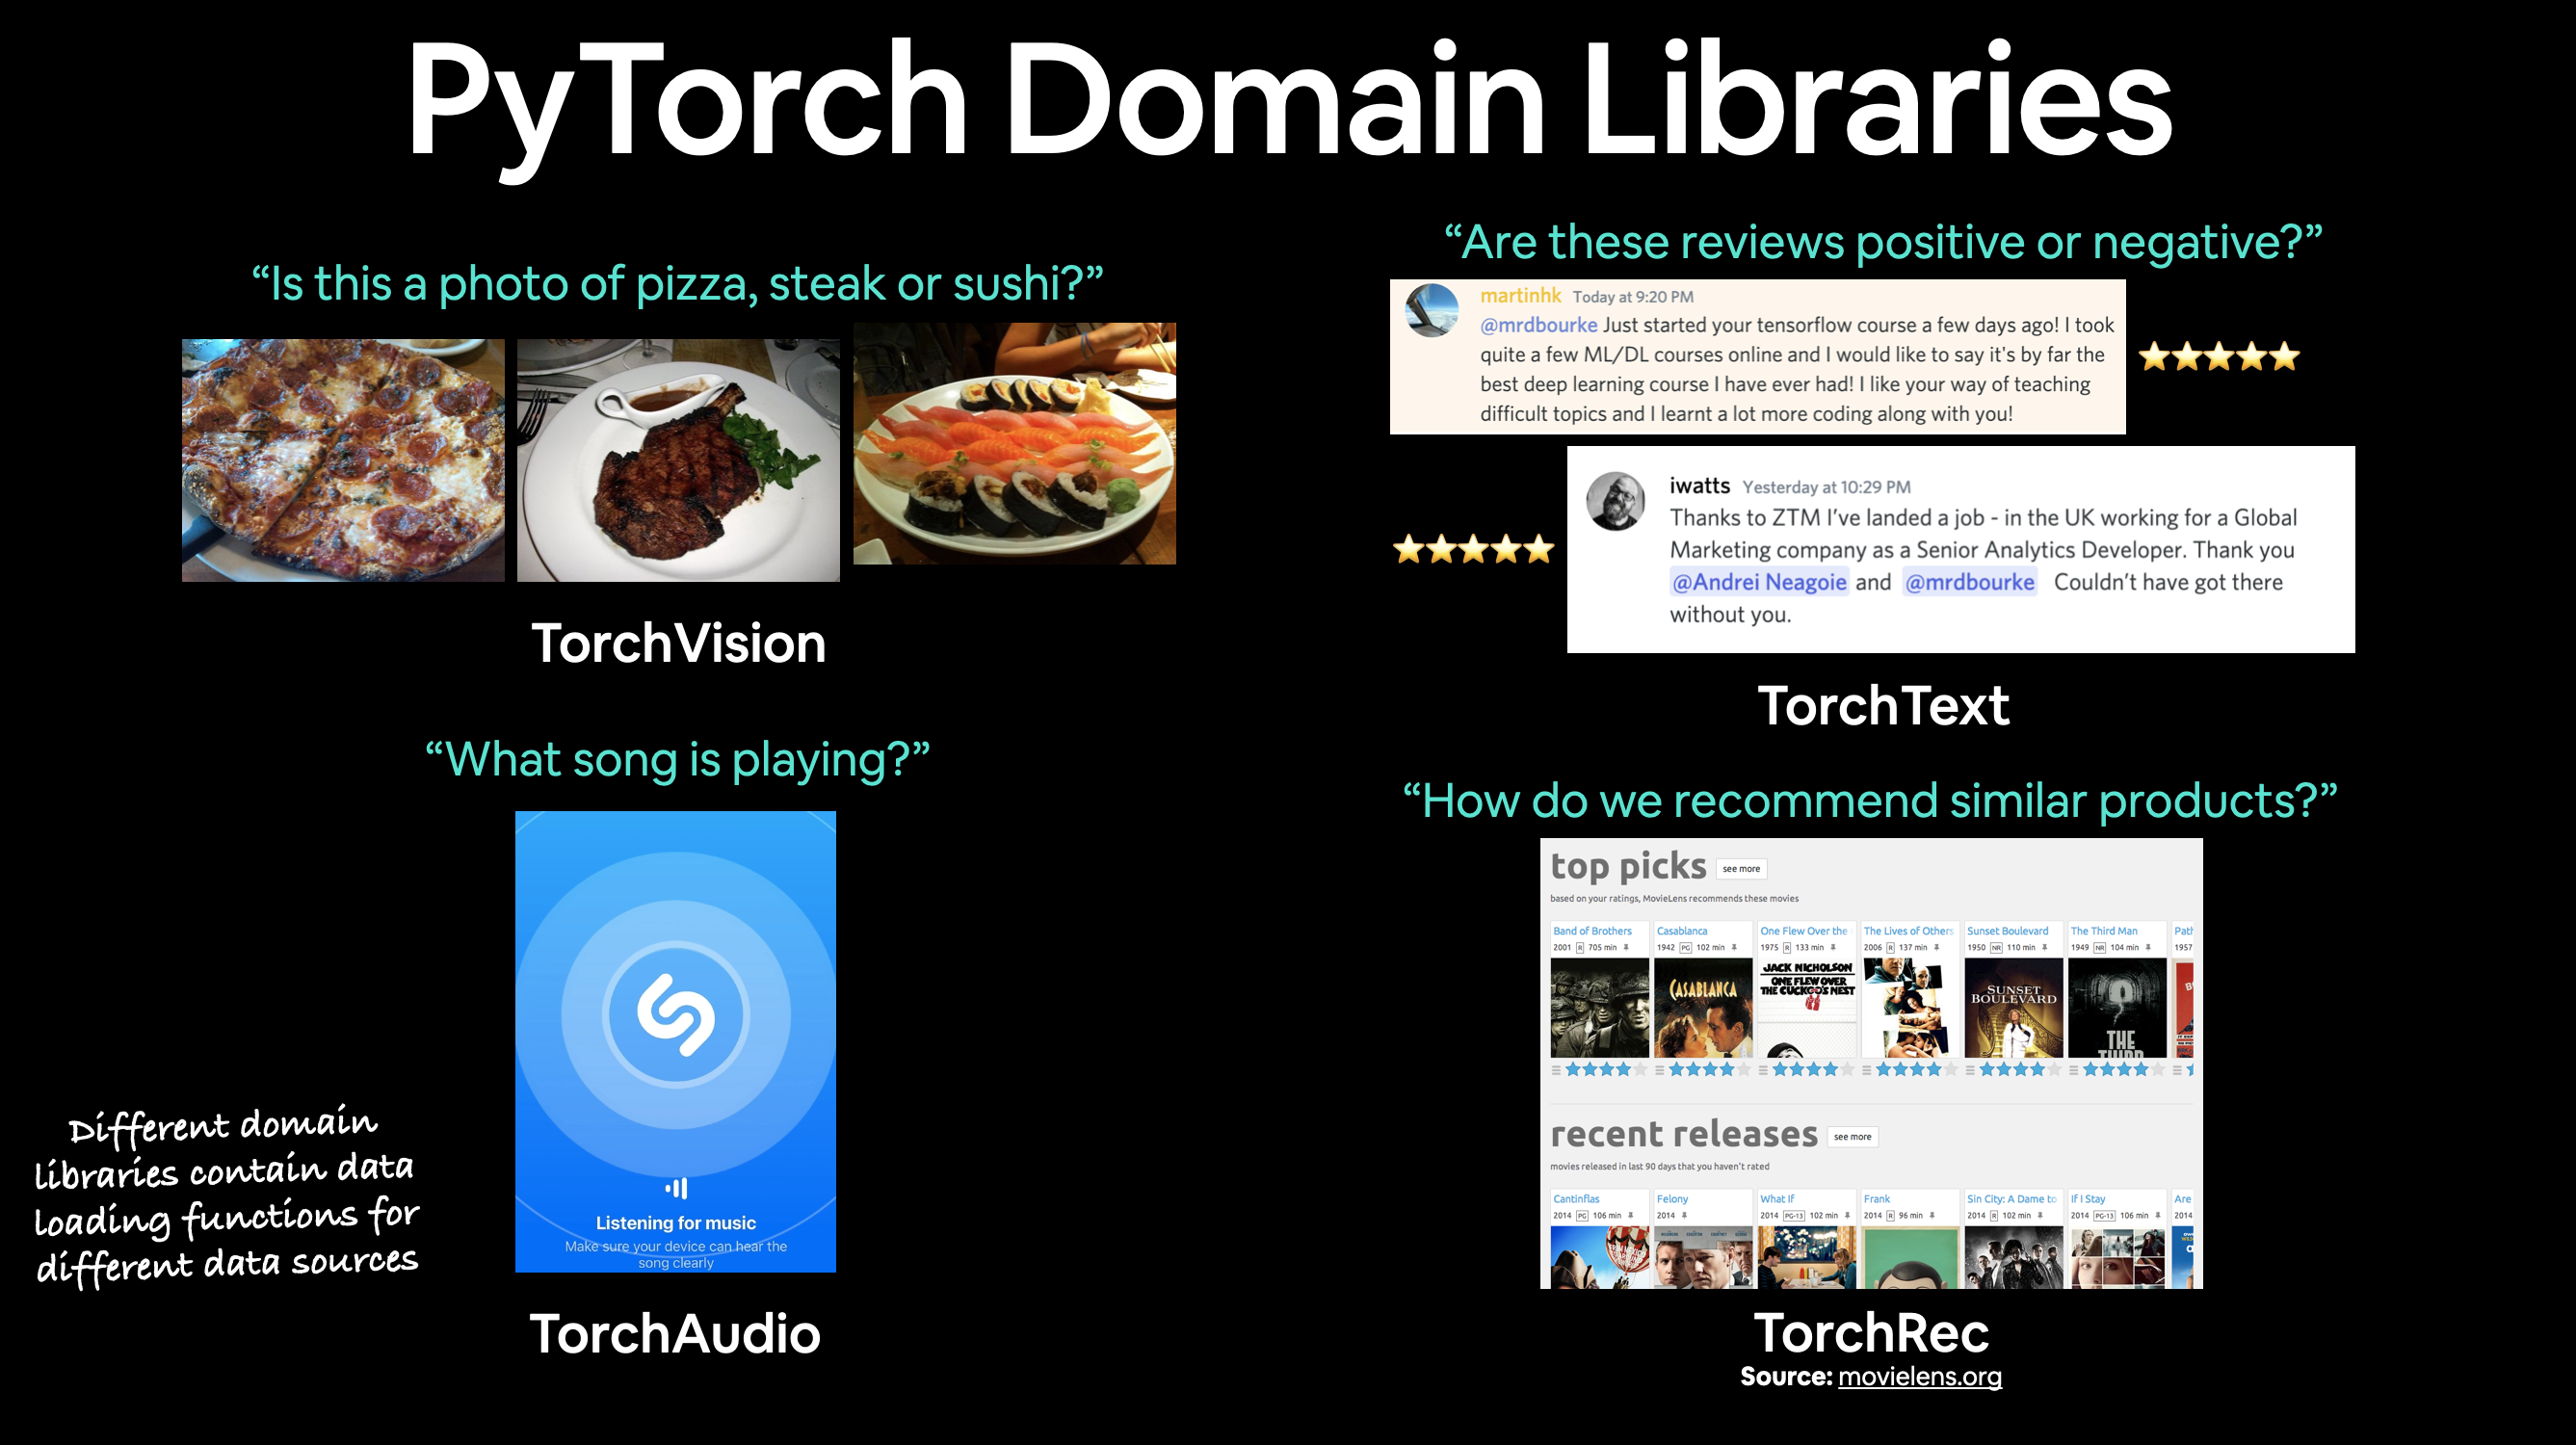

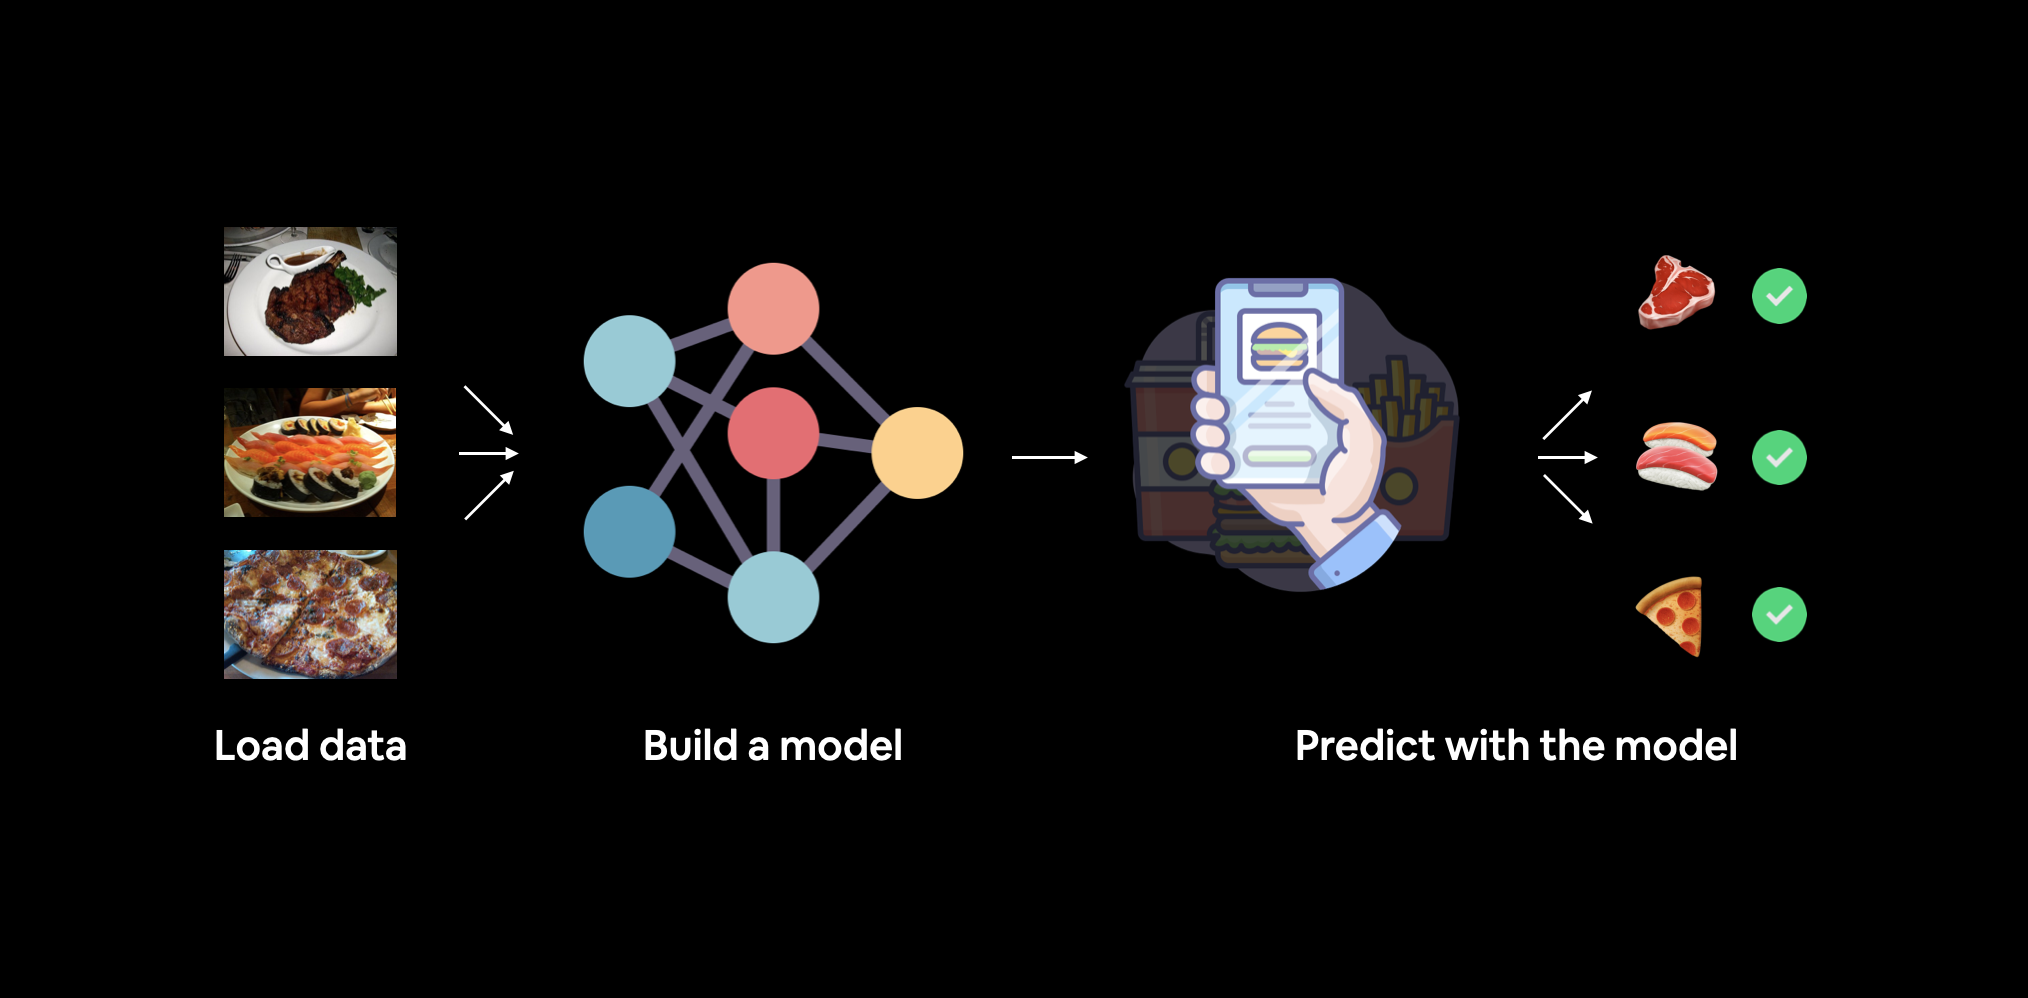

## *Importing PyTorch and setting up device-agnostic code*

In [ ]:
import torch
from torch import nn

torch.__version__

## *Getting data*

In [ ]:
import requests
from zipfile import ZipFile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)
    os.remove(data_path/ "pizza_steak_sushi.zip")

data/pizza_steak_sushi directory exists.


## *Become one with the data*

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f"There are {len(dirname)} directories , {len(filename)} files are in {dirpath}")


In [ ]:
walk_through_dir(image_path)

There are 2 directories , 0 files are in data/pizza_steak_sushi
There are 3 directories , 0 files are in data/pizza_steak_sushi/train
There are 0 directories , 72 files are in data/pizza_steak_sushi/train/sushi
There are 0 directories , 78 files are in data/pizza_steak_sushi/train/pizza
There are 0 directories , 75 files are in data/pizza_steak_sushi/train/steak
There are 3 directories , 0 files are in data/pizza_steak_sushi/test
There are 0 directories , 31 files are in data/pizza_steak_sushi/test/sushi
There are 0 directories , 25 files are in data/pizza_steak_sushi/test/pizza
There are 0 directories , 19 files are in data/pizza_steak_sushi/test/steak


In [ ]:
train_dir= image_path/ "train"
test_dir= image_path/ "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## *Visualize an image*

class:pizza
Height:512
width:512


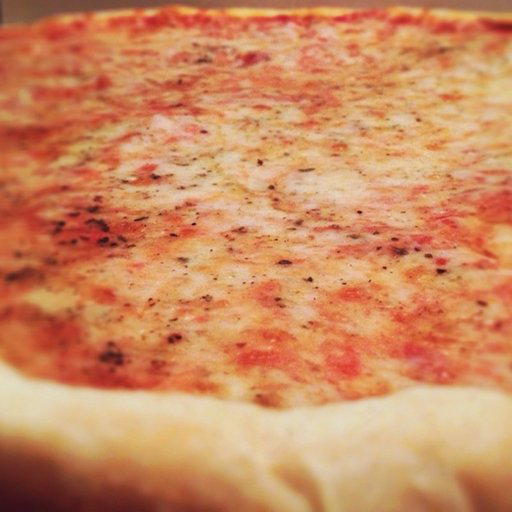

In [ ]:
import random
from PIL import Image

image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image_path= random.choice(image_path_list)
image_class= random_image_path.parent.stem
img= Image.open(random_image_path)

print(f"class:{image_class}")
print(f"Height:{img.height}")
print(f"width:{img.width}")
img

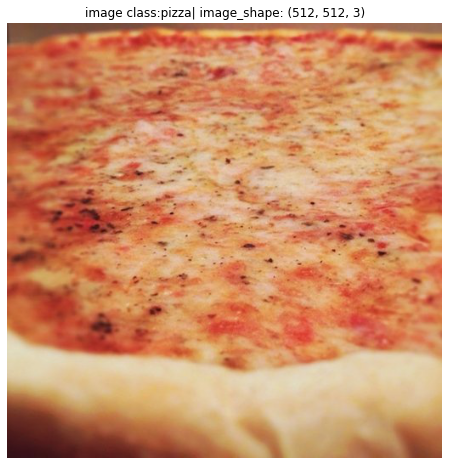

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array= np.asarray(img)
plt.figure(figsize=(10,8))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class}| image_shape: {img_as_array.shape}")
plt.axis(False);

## *Transforming data*

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([transforms.Resize(size= (64,64)), transforms.RandomHorizontalFlip(p= 0.4),transforms.ToTensor()])

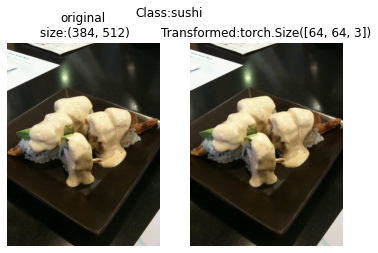

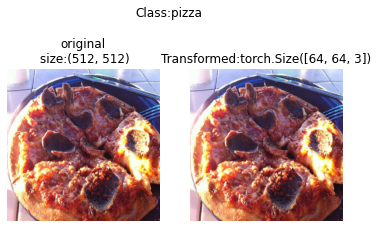

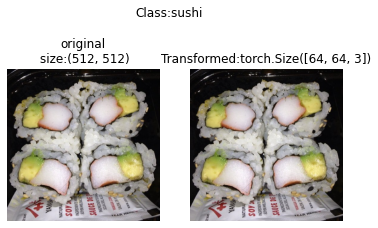

In [ ]:
def plot_transformed_image(image_path, transform, n):
  random_image_paths= random.sample(image_path, n)

  for i in random_image_paths:
    with Image.open(i) as f:
      fig, ax= plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\n size:{f.size}")
      ax[0].axis("off")

      transformed_image= transform(f).permute(1,2, 0)
      ax[1].imshow(f)
      ax[1].set_title(f"Transformed:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class:{i.parent.stem}")

plot_transformed_image(image_path= image_path_list, transform=data_transform, n=3)



## *Loading image data using ImageFolder*

In [ ]:
from torchvision import datasets

train_data= datasets.ImageFolder(root= train_dir,transform= data_transform, target_transform=None )
test_data= datasets.ImageFolder(root= test_dir, transform= data_transform)
test_data

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.4)
               ToTensor()
           )

In [ ]:
class_names= train_data.classes
type(class_names)

list

In [ ]:
print(train_data.classes)
print(len(train_data),len(test_data))
print(train_data.class_to_idx)

['pizza', 'steak', 'sushi']
225 75
{'pizza': 0, 'steak': 1, 'sushi': 2}


In [ ]:
img, label = train_data[0][0], train_data[0][1]
img.shape, label
print(f"image shape: {img.shape}")
print(f"image type:{type(img)}")
print(f"label:{label}")
print(f"label type:{type(label)}")
img

image shape: torch.Size([3, 64, 64])
image type:<class 'torch.Tensor'>
label:0
label type:<class 'int'>


tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
print(class_names[label])

pizza


Original shape:torch.Size([3, 64, 64])
Matplotlib shape:torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

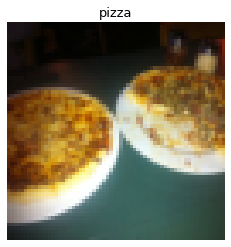

In [ ]:
import matplotlib.pyplot as plt
img_permute= img.permute(1,2,0)
print(f"Original shape:{img.shape}")
print(f"Matplotlib shape:{img_permute.shape}")
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=13)
plt.axis(False)

## *Turn loaded image into dataloaders*

In [ ]:
from torch.utils.data import DataLoader

train_dataloader= DataLoader(dataset= train_data, batch_size= 1, num_workers= 1,shuffle= True)
test_dataloader= DataLoader(dataset= test_data, batch_size= 1, num_workers= 1,shuffle= False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3704e02880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3704e02dc0>)

In [ ]:
img, label= next(iter(train_dataloader))
print(img.shape, label.shape)

torch.Size([1, 3, 64, 64]) torch.Size([1])


## *Loading image data using a custom dataset*

In [ ]:
import os
import torch
import pathlib
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from typing import Tuple, List, Dict


In [ ]:
target_dir= train_dir
print(f"Target directory:{target_dir}")

class_names_found= sorted(entry.name for entry in list(os.scandir(image_path/ "train")))
print(f"class names in directory:{class_names_found}")

Target directory:data/pizza_steak_sushi/train
class names in directory:['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory:int)-> Tuple[List[str], Dict[str, int]]:
  classes= sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"couldn't find any classes in {directory}")

  class_to_idx= {cls_names: i for i, cls_names in enumerate(classes)}
  return classes, class_to_idx



In [ ]:
find_classes(test_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## *Create a custom Dataset to replicate ImageFolder*

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, target_dir:str, transform=None)->None:

    self.paths= list(pathlib.Path(target_dir).glob("*/*.jpg"))
    
    self.transform= transform
    self.classes, self.class_to_idx= find_classes(target_dir)

  def load_image(self, index:int)-> Image.Image:
    image_path= self.paths[index]
    return Image.open(image_path)

  def __len__(self) ->int:
    return len(self.paths)

  def __getitem__(self, index:int)-> Tuple[torch.Tensor, int]:
    img= self.load_image(index)
    class_name= self.paths[index].parent.stem
    class_idx= self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx




In [ ]:
train_transforms = transforms.Compose([transforms.Resize((64, 64)), transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor()])


In [ ]:
train_data_custom= ImageFolderCustom(target_dir= train_dir, transform= train_transforms)
test_data_custom= ImageFolderCustom(target_dir= test_dir, transform= test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f3704d9ac10>,
 <__main__.ImageFolderCustom at 0x7f3704e770a0>)

In [ ]:
print(train_data_custom.classes)
print(train_data_custom.class_to_idx)
print(len(train_data_custom), len(test_data_custom))

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}
225 75


In [ ]:
print((len(train_data_custom)== len(train_data)) & (len(test_data_custom)==len(test_data)))
print(train_data_custom.classes== train_data.classes)
print(train_data_custom.class_to_idx== train_data.class_to_idx)

True
True
True


In [ ]:
import random
def display_random_image(dataset:torch.utils.data.Dataset, classes:List[str]=None, n: int= 10, display_shape:bool=True):

  if n> 10:
    n= 10
    display_shape= False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  random_sample_img= random.sample(range(len(dataset)), k= n)
  plt.figure(figsize=(16, 8))

  for i, target_sample in enumerate(random_sample_img):
    targ_img, targ_label = dataset[target_sample][0], dataset[target_sample][1]
    targ_img_adjust= targ_img.permute(1, 2, 0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis('off')
    if classes:
      title= f"class: {classes[targ_label]}"
      if display_shape:
        title= title + f"\nshape:{targ_img_adjust.shape}"
    plt.title(title)



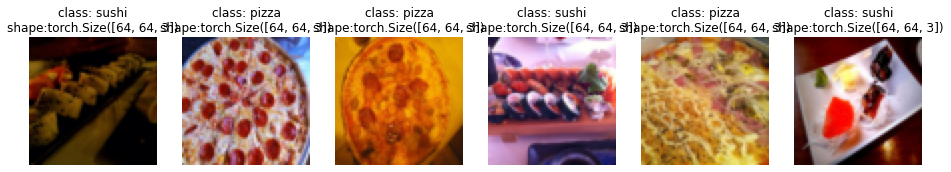

In [ ]:
display_random_image(train_data, classes= class_names, n= 6)

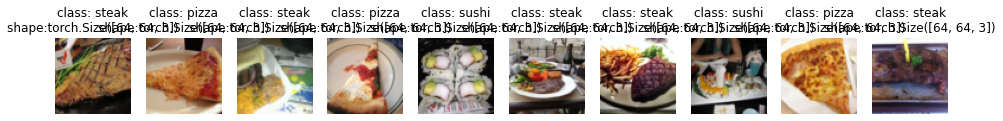

In [ ]:
display_random_image(train_data, classes= class_names, n= 10)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader_custom= DataLoader(dataset= train_data_custom,batch_size= 1, num_workers= 0, shuffle= True)

test_dataloader_custom= DataLoader(dataset= test_data_custom, batch_size= 1, num_workers= 0, shuffle= False)

print(train_dataloader_custom, test_dataloader_custom)


<torch.utils.data.dataloader.DataLoader object at 0x7f3704292370> <torch.utils.data.dataloader.DataLoader object at 0x7f3704227310>


In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f"image shape: {img_custom.shape}, label shape:{label_custom.shape}")

image shape: torch.Size([1, 3, 64, 64]), label shape:torch.Size([1])


## *Data augmentation*

In [ ]:
from torchvision import transforms

train_transforms= transforms.Compose([transforms.Resize((224,224)), transforms.TrivialAugmentWide(num_magnitude_bins= 31),transforms.ToTensor()])
test_transforms= transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])


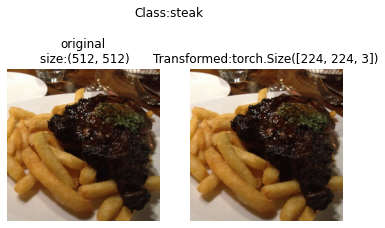

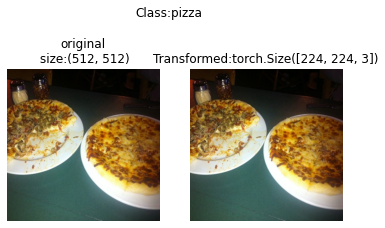

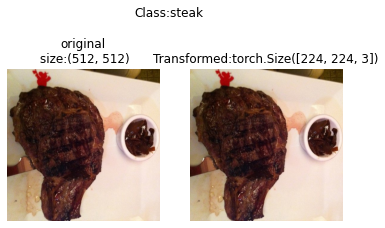

In [ ]:
image_path_list= list(image_path.glob('*/*/*.jpg'))
plot_transformed_image(image_path= image_path_list, transform= train_transforms, n=3)

## *Model0: TinyVGG without data augmentation*

In [ ]:
simple_transform= transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()])

In [ ]:
from torchvision import datasets
train_data_simple= datasets.ImageFolder(root= train_dir,transform=simple_transform)
test_data_simple= datasets.ImageFolder(root= test_dir,transform=simple_transform)

import os
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

print(f"creating dataloader with batch_size {BATCH_SIZE} and number of workers {NUM_WORKERS}")

train_dataloader_simple= DataLoader(train_data_simple, batch_size= BATCH_SIZE, num_workers= NUM_WORKERS, shuffle=True)
test_dataloader_simple= DataLoader(test_data_simple, batch_size= BATCH_SIZE, num_workers= NUM_WORKERS, shuffle=False)
train_dataloader_simple, test_dataloader_simple


creating dataloader with batch_size 32 and number of workers 2


(<torch.utils.data.dataloader.DataLoader at 0x7f37044ae760>,
 <torch.utils.data.dataloader.DataLoader at 0x7f37044ae340>)

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## *Create Tinyvgg model class*



In [ ]:
class Tinyvgg(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()

    self.conv_block1= nn.Sequential(
        nn.Conv2d(in_channels= input_shape, out_channels= hidden_units, kernel_size= 3,padding= 1, stride= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size= 3,padding= 1, stride= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)

    )

    self.conv_block2= nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size= 3,padding= 1),
        nn.ReLU(),
        nn.Conv2d( hidden_units, hidden_units, kernel_size= 3,padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
        
    )

    self.classifier= nn.Sequential(
        
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*16*16, out_features= output_shape)
    )
  
  def forward(self, x:torch.Tensor):
    x= self.conv_block1(x)
    x= self.conv_block2(x)
    x= self.classifier(x)
    return x


model0= Tinyvgg(input_shape= 3, hidden_units= 10, output_shape= len(train_data.classes)).to(device)
model0





Tinyvgg(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

## *Try a forward pass on an image*


In [ ]:
img_batch, label_batch= next(iter(train_dataloader_simple))
img_single, label_single= img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape:{img_single.shape}")

model0.eval()

with torch.inference_mode():
  pred= model0(img_single.to(device))
  print(f"output ligits:{pred}\n")
  print(f"Output probability:{torch.softmax(pred, dim= 1)}\n")
  print(f" Output prediction label:{torch.argmax(torch.softmax(pred, dim= 1))}\n")
  print(f"Actual Label:{label_single}\n")


Single image shape:torch.Size([1, 3, 64, 64])
output ligits:tensor([[-0.1239, -0.0557,  0.0267]])

Output probability:tensor([[0.3093, 0.3311, 0.3596]])

 Output prediction label:2

Actual Label:1



## *Use torchinfo to get an idea of the shapes going through our model*

In [ ]:
try:
  import torchinfo

except:


  !pip install torchinfo
  import torchinfo

from torchinfo import summary

summary(model0, [1, 3,64,64])




NameError: ignored

## *Create train & test loop functions*

In [ ]:
def train_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, optimizer:torch.optim.Optimizer):
  
  model.train()
  train_loss, train_acc= 0, 0

  for batch, (X,y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)
    y_pred= model(X)
    loss= loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    y_pred_class= torch.argmax(torch.softmax(y_pred, dim= 1),dim= 1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred_class)

  train_loss/= len(dataloader)
  train_acc/= len(dataloader)

  return train_loss, train_acc




In [ ]:
def test_step(model:torch.nn.Module, dataloader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module):

  model.eval()
  test_loss, test_acc= 0, 0
  with torch.inference_mode():

    for batch, (X,y) in enumerate(dataloader):

      X,y = X.to(device), y.to(device)

      test_pred_logits= model(X)

      loss= loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels= test_pred_logits.argmax(dim= 1)
      test_acc += ((test_pred_labels == y).sum().item()/ len(test_pred_labels))

    test_loss/= len(dataloader)
    test_acc/= len(dataloader)
    return test_loss, test_acc




## *Creating a train() function to combine train_step() and test_step()*

In [ ]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module, train_dataloader: torch.utils.data.DataLoader, test_dataloader:torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer, loss_fn= nn.CrossEntropyLoss(), epochs: int=5):
  
  results= {
      "train_loss":[],"train_acc":[],"test_loss":[],
       "test_acc":[]
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc= train_step(model= model, dataloader= train_dataloader, loss_fn= loss_fn, optimizer= optimizer)
    test_loss, test_acc= test_step(model= model, dataloader= test_dataloader, loss_fn= loss_fn)

    print(f"Epoch:{epoch + 1}|", f"Train loss:{train_loss:.4f}|",f"Train acc:{train_acc:.4f}|",f"Test loss:{test_loss:.4f}|",f"Test acc:{test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results




## *Train and Evaluate Model0*

In [ ]:
NUM_EPOCHS= 5

model0= Tinyvgg(input_shape= 3, hidden_units= 10, output_shape= len(train_data.classes)).to(device)

loss_fn= torch.nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params= model0.parameters(), lr= 0.001)

from timeit import default_timer as timer

start_time= timer()

model0_results= train(model= model0, train_dataloader= train_dataloader_simple,test_dataloader= test_dataloader_simple, loss_fn= loss_fn,
                      optimizer= optimizer, epochs= NUM_EPOCHS)

end_time= timer()

print(f"Total train time:{end_time-start_time}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1| Train loss:1.1000| Train acc:0.4102| Test loss:1.1086| Test acc:0.2604
Epoch:2| Train loss:1.0819| Train acc:0.4258| Test loss:1.1502| Test acc:0.2604
Epoch:3| Train loss:1.0828| Train acc:0.4258| Test loss:1.1672| Test acc:0.2604
Epoch:4| Train loss:1.1280| Train acc:0.3047| Test loss:1.1539| Test acc:0.2604
Epoch:5| Train loss:1.0999| Train acc:0.3047| Test loss:1.1398| Test acc:0.2917
Total train time:7.5589560559999995


In [ ]:
model0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

## *Plot loss curves of model0*

In [ ]:
def plot_loss_curve(results: Dict[str, List[float]]):

  loss= results["train_loss"]
  test_loss= results["test_loss"]
  accuracy= results["train_acc"]
  test_accuracy= results["test_acc"]

  epochs= range(len(results["test_acc"]))
  

  plt.figure(figsize= (15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label= "train loss")
  plt.plot(epochs, test_loss, label= "test loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label= "train accuracy")
  plt.plot(epochs, test_accuracy, label= "test accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();




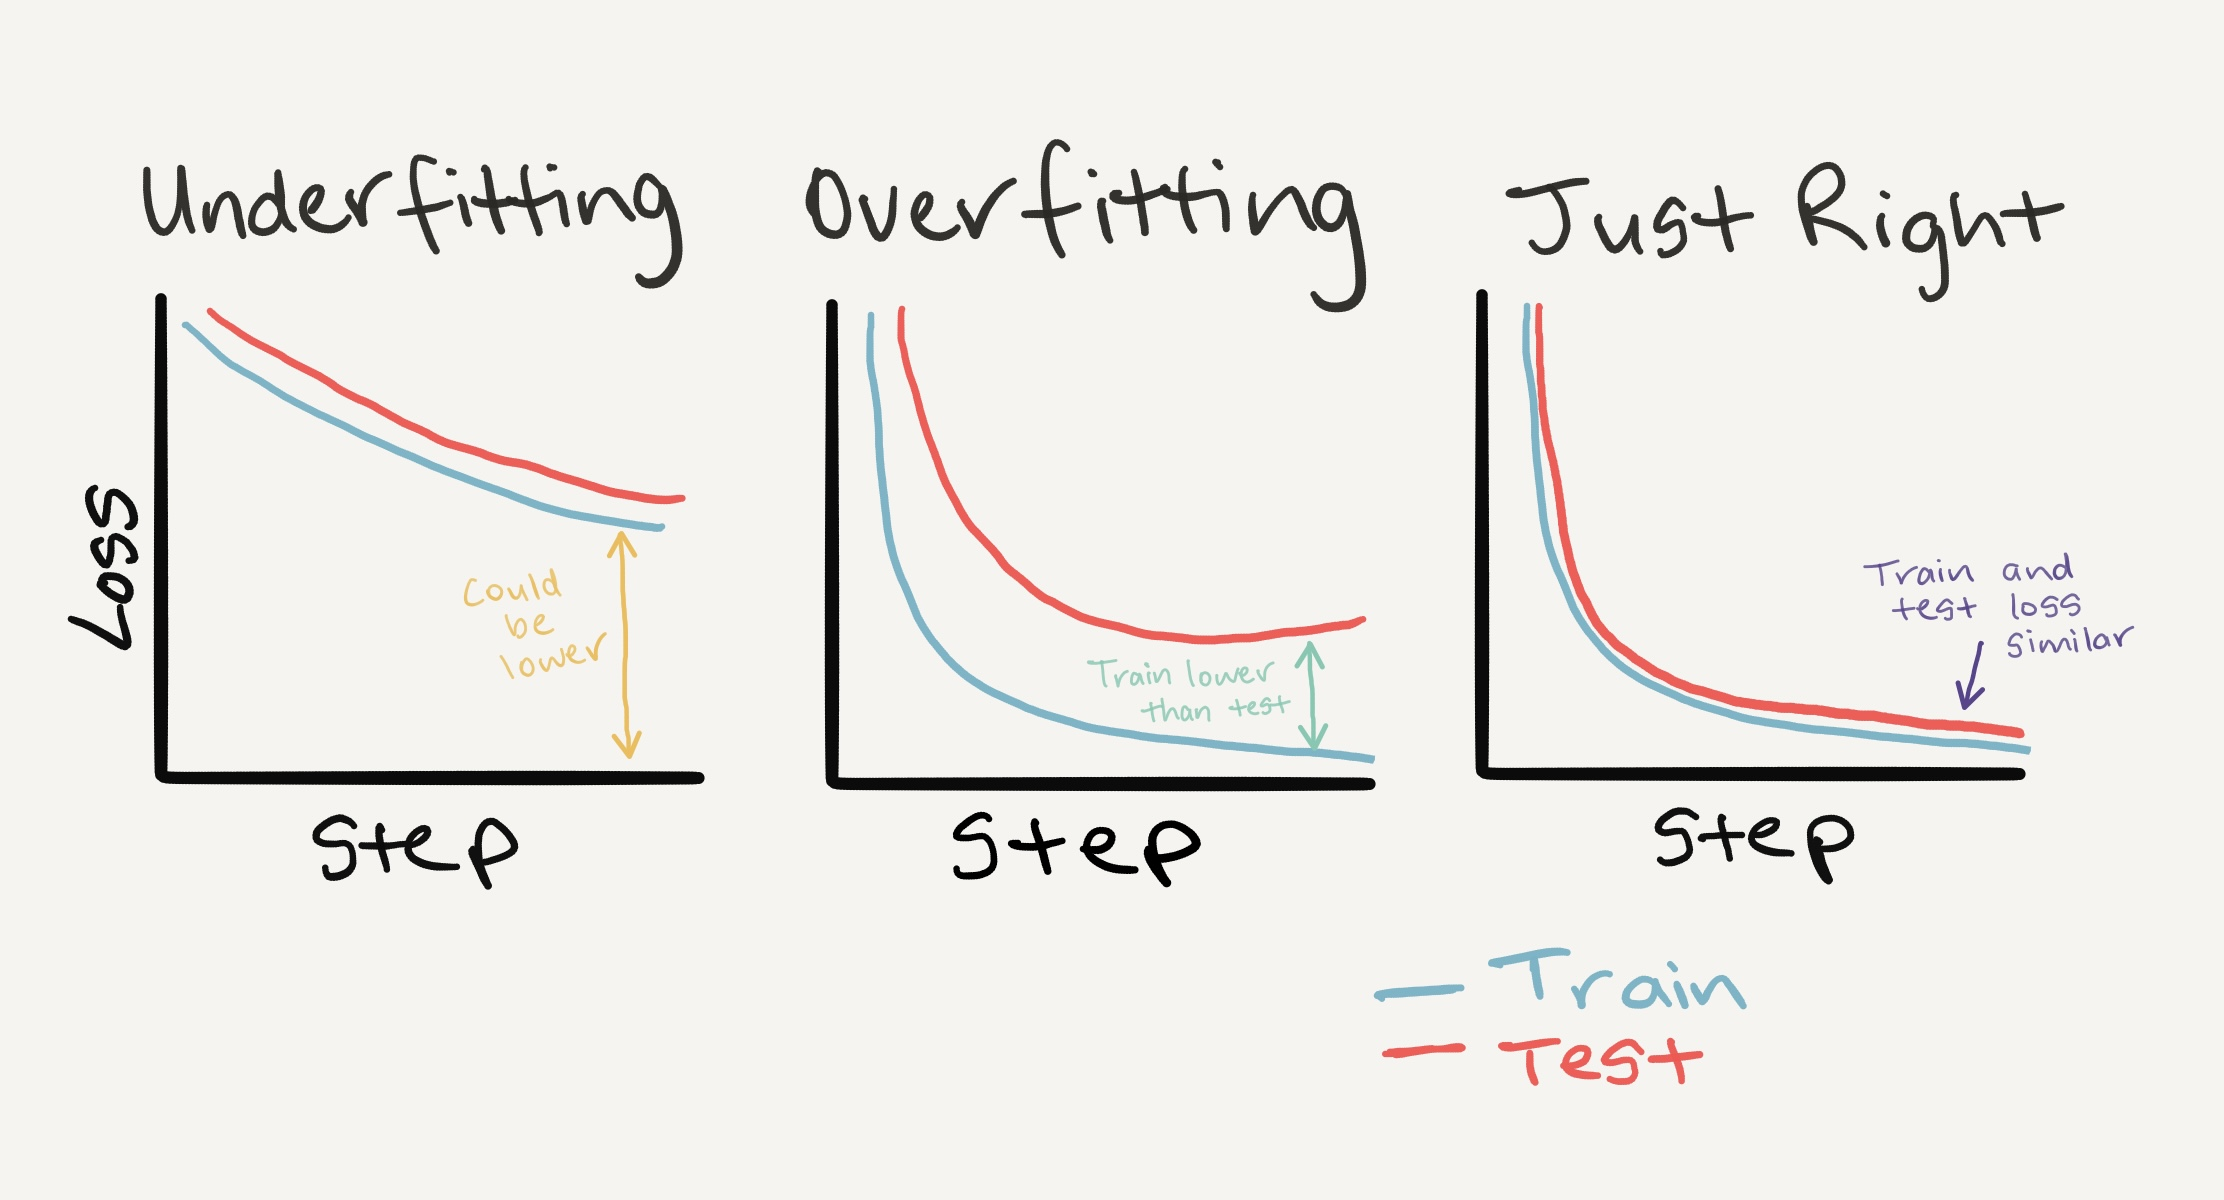

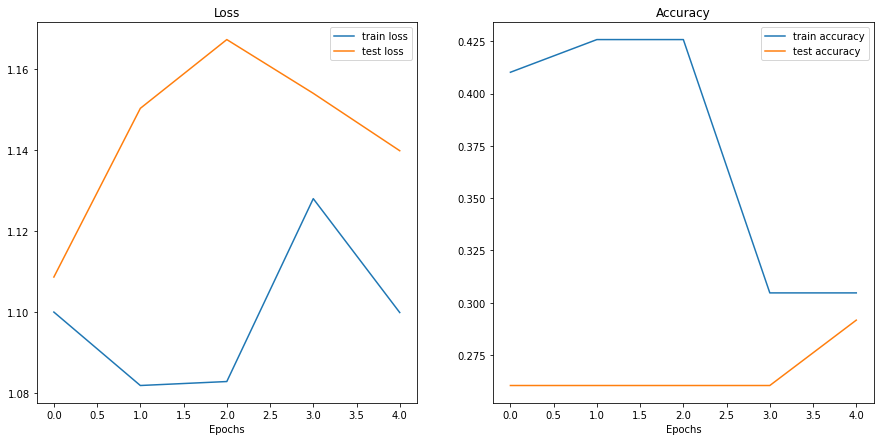

In [ ]:
plot_loss_curve(model0_results)

## *Model 1: TinyVGG with Data Augmentation*

In [ ]:
train_transform_trivial_augment= transforms.Compose([transforms.Resize((64,64)), transforms.TrivialAugmentWide(num_magnitude_bins= 31), transforms.ToTensor()])
test_transform= transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor()])

train_transform_trivial_augment, test_transform

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
 ), Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
     ToTensor()
 ))

In [ ]:
train_data_augmented= datasets.ImageFolder(train_dir, transform= train_transform_trivial_augment)
test_data_simple= datasets.ImageFolder(test_dir, transform= test_transform)
train_data_augmented, test_data_simple, train_data_augmented.classes

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ), ['pizza', 'steak', 'sushi'])

## *Create train and test Dataset's and DataLoader's*

In [ ]:
import os
BATCH_SIZE= 32
NUM_WORKERS= os.cpu_count()

train_dataloader_augmented= DataLoader(train_data_augmented,batch_size= BATCH_SIZE, num_workers= NUM_WORKERS, shuffle= True)
test_dataloader_simple= DataLoader(test_data_simple, batch_size= BATCH_SIZE, num_workers=NUM_WORKERS, shuffle= False)



## *Construct and train Model1*

In [ ]:
model1= Tinyvgg(input_shape= 3, hidden_units= 10, output_shape= len(train_data_augmented.classes)).to(device)
model1

Tinyvgg(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
NUM_EPOCHS= 5
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(params= model1.parameters(), lr= 0.001)

from timeit import default_timer as timer
start_time= timer()

model1_results= train(model= model1, train_dataloader= train_dataloader_augmented, test_dataloader= test_dataloader_simple, loss_fn= loss_fn, optimizer= optimizer,
                      epochs= NUM_EPOCHS)

end_time= timer()
print(f"Total training time:{end_time-start_time:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:1| Train loss:1.0964| Train acc:0.4023| Test loss:1.1231| Test acc:0.2604
Epoch:2| Train loss:1.1111| Train acc:0.3047| Test loss:1.1133| Test acc:0.2604
Epoch:3| Train loss:1.0916| Train acc:0.4258| Test loss:1.0769| Test acc:0.2604
Epoch:4| Train loss:1.1236| Train acc:0.3047| Test loss:1.0935| Test acc:0.2604
Epoch:5| Train loss:1.0900| Train acc:0.4492| Test loss:1.1270| Test acc:0.2188
Total training time:8.692


## *Plot the loss curves of Model 1*

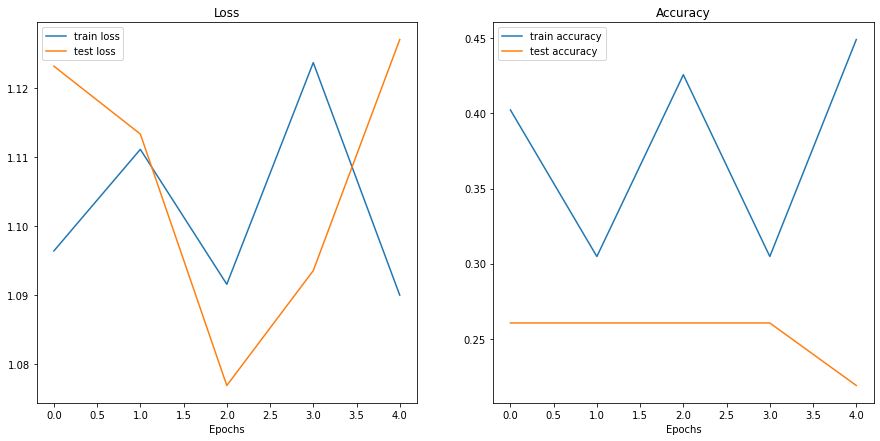

In [ ]:
plot_loss_curve(model1_results)

## *Compare model results*

In [ ]:
import pandas as pd
model0_df= pd.DataFrame(model0_results)
model1_df= pd.DataFrame(model1_results)
model0_df

train_loss  train_acc  test_loss  test_acc
0    1.099976   0.410156   1.108620  0.260417
1    1.081859   0.425781   1.150240  0.260417
2    1.082837   0.425781   1.167206  0.260417
3    1.127958   0.304688   1.153948  0.260417
4    1.099859   0.304688   1.139782  0.291667

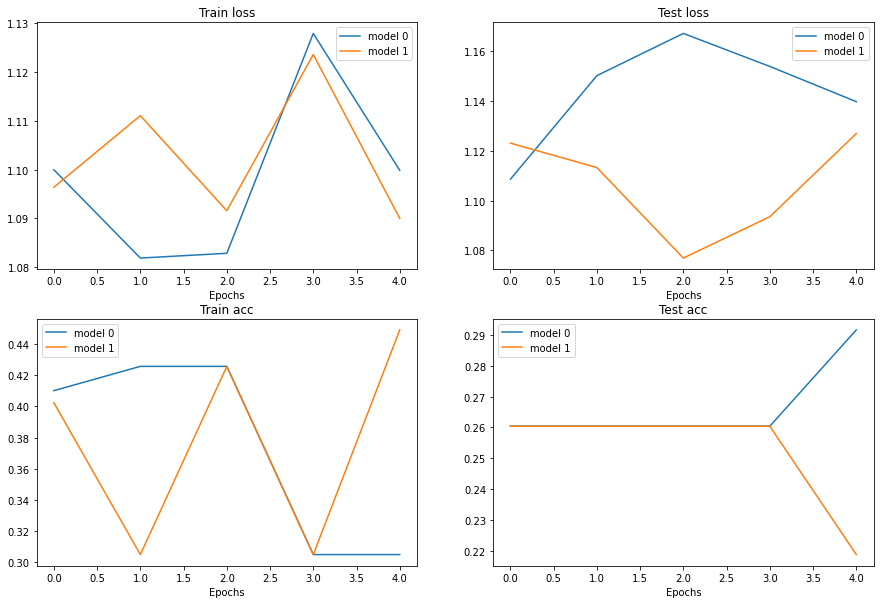

In [ ]:
plt.figure(figsize=(15, 10))

epochs= range(len(model0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model0_df["train_loss"], label= "model 0")
plt.plot(epochs, model1_df["train_loss"], label= "model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model0_df["test_loss"], label= "model 0")
plt.plot(epochs, model1_df["test_loss"], label= "model 1")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model0_df["train_acc"], label= "model 0")
plt.plot(epochs, model1_df["train_acc"], label= "model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2, 4)
plt.plot(epochs, model0_df["test_acc"], label= "model 0")
plt.plot(epochs, model1_df["test_acc"], label= "model 1")
plt.title("Test acc")
plt.xlabel("Epochs")
plt.legend()

## *Make prediction on a custom image*

In [ ]:
import requests

custom_image_path= data_path/ 'pizza_dad.jpeg'

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)

else:
  print(f"{custom_image_path} already exists, skipping download.")


## *Loading in a custom image with PyTorch*

In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(custom_image_uint8)
print(f"Shape of a custom image tensor:{custom_image_uint8.shape}")
print(f"Type of custom image:{custom_image_uint8.dtype}")

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Shape of a custom image tensor:torch.Size([3, 4032, 3024])
Type of custom image:torch.u

In [ ]:
model1.eval()
with torch.inference_mode():
  model1(custom_image_uint8.to(device))

RuntimeError: ignored

In [ ]:
custom_image= torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image= custom_image / 255
#custom_image= custom_image.squeeze()

print(f"Custom image shape:{custom_image.shape}")
print(f"Custom image tensor:{custom_image}")
print(f"Custom image dtype:{custom_image.dtype}")

Custom image shape:torch.Size([3, 4032, 3024])
Custom image tensor:tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 

## *Predicting on custom images with a trained PyTorch model*

(-0.5, 3023.5, 4031.5, -0.5)

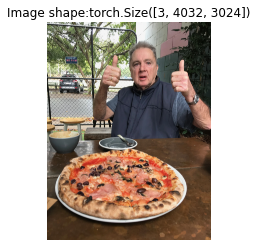

In [ ]:
plt.imshow(custom_image.permute(1,2,0))
plt.title(f"Image shape:{custom_image.shape}")
plt.axis(False)

In [ ]:
custom_image_transform= transforms.Compose([transforms.Resize((64, 64))])
custom_image_transformed= custom_image_transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [ ]:
model1.eval()
with torch.inference_mode():
  model1(custom_image_transformed)

RuntimeError: ignored

In [ ]:
model1.eval()
with torch.inference_mode():
  print(f"custom image transformed shape:{custom_image_transformed.shape}")
  custom_image_transformed_with_batch= custom_image_transformed.unsqueeze(dim=0)
  print(f"custom image transform with batch size:{custom_image_transformed_with_batch.shape}")
  custom_image_pred= model1(custom_image_transformed_with_batch).to(device)

custom image transformed shape:torch.Size([3, 64, 64])
custom image transform with batch size:torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[-0.0758, -0.0176, -0.1739]])

In [ ]:
print(f"Prediction logits:{custom_image_pred}")
custom_image_pred_probs=torch.softmax(custom_image_pred, dim=1)
print(f"Prediction Probabilities:{custom_image_pred_probs}")
custom_image_pred_label= torch.argmax(custom_image_pred_probs)
print(f"Prediction label:{custom_image_pred_label}")

Prediction logits:tensor([[-0.0758, -0.0176, -0.1739]])
Prediction Probabilities:tensor([[0.3371, 0.3573, 0.3056]])
Prediction label:1


In [ ]:
custom_image_predict_class= class_names[custom_image_pred_label.cpu()]
custom_image_predict_class

'steak'

In [ ]:
custom_image_pred_probs

tensor([[0.3371, 0.3573, 0.3056]])

## *Putting custom image prediction together: building a function*

In [ ]:
def pred_and_plot_image(model:torch.nn.Module, image_path:str, class_names: List[str]= None, transform= None, device: torch.device=device):
  
  target_image= torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image= target_image / 255
  if transform:
    target_image= transform(target_image)

  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image= target_image.unsqueeze(dim= 0)
    print(target_image.shape)
    target_image_pred= model(target_image.to(device))
    target_image_pred_probs= torch.softmax(target_image_pred, dim= 1)
    target_image_pred_label= torch.argmax(target_image_pred_probs, dim= 1)
    
    plt.imshow(target_image.squeeze().permute(1,2,0))
    if class_names:
      title= f"Pred:{class_names[target_image_pred_label.cpu()]}|Prob:{target_image_pred_probs.max().cpu():.3f}"
    else:
      title= f"Pred:{target_image_pred_label.cpu()}|Prob:{target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)



torch.Size([1, 3, 64, 64])


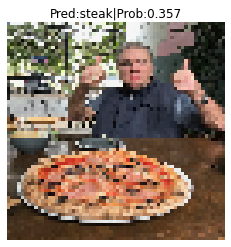

In [ ]:
pred_and_plot_image(model= model1, image_path= custom_image_path, class_names= class_names, transform= custom_image_transform, device= device)